# Advanced Regression Assignment

In [59]:
# I am using google colaboratory envirnoment for this project
# The data files are uploaded in the personal google drive
# Here, I am importing those files from the google drive

%%shell

if [ ! -f day.csv ]; then
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1t6E6EgwXHSz51wfQIbMfN4XtTzh89y5y' -O train.csv
fi

if [ ! -f dictionary.txt ]; then
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uSHSNDUrVv_oZlg03zytjwDZ05-VWZDP' -O data_description.txt
fi

--2022-04-11 18:37:22--  https://docs.google.com/uc?export=download&id=1t6E6EgwXHSz51wfQIbMfN4XtTzh89y5y
Resolving docs.google.com (docs.google.com)... 142.250.31.138, 142.250.31.100, 142.250.31.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/19neqhja0v441mdo5eqgk97l6qgvops5/1649702175000/07853932201158696572/*/1t6E6EgwXHSz51wfQIbMfN4XtTzh89y5y?e=download [following]
--2022-04-11 18:37:23--  https://doc-0s-3k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/19neqhja0v441mdo5eqgk97l6qgvops5/1649702175000/07853932201158696572/*/1t6E6EgwXHSz51wfQIbMfN4XtTzh89y5y?e=download
Resolving doc-0s-3k-docs.googleusercontent.com (doc-0s-3k-docs.googleusercontent.com)... 142.250.81.193, 2607:f8b0:4004:82f::2001
Connecting to doc-0s-3k-docs.googleusercontent.com (doc-0s-3k-docs.go

# Import commonly used libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import rcParams

# Load Data in DataFrame

In [61]:
df=pd.read_csv('train.csv')

# Data Understanding

In [62]:
# Check dataframe's shape and the first 5 rows
# There are 1460 rows and 81 columns

print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# Understand the meaning of each feature using data dictionay
# Dataset contains a lot of features. Hence, features selection is needed

!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [64]:
# Check for null values and data types
# There are some null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning and Manipulation

## Drop Null Columns

In [65]:
# In this cell, we find the percentage of null values in each column
# Percentage helps to easily compare number of null values with respect total datapoints
# 19 columns have at least one null value

pd.set_option('display.max_rows', 1000)
null_cols=df.isnull().mean()*100
print(f'Number of columns with null values = {(null_cols>0).sum()}')
print(f'Number of columns with >10% null values = {(null_cols>10).sum()}')
print()
print(null_cols[null_cols>0].sort_values())
pd.set_option('display.max_rows', 20)

Number of columns with null values = 19
Number of columns with >10% null values = 6

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


In [66]:
# Based on above analysis I drop columns with more than 10% null values
# Now we have 75 columns/variables.

columns=null_cols[null_cols>10].index
df=df.drop(columns=columns)
df.shape

(1460, 75)

In [67]:
# In this cell, I find the percentage of null values in the remaining 10 columns
# Because of the small number of null values in the remaining columns we can either drop or impute them
# It can be seen that remaining variables have <10% null values

null_cols=df.isnull().mean()*100
print(f'Number of Null Variables = {(null_cols>0).sum()}')
print()
null_cols[null_cols>0].sort_values()

Number of Null Variables = 13



Electrical      0.068493
MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
BsmtExposure    2.602740
BsmtFinType2    2.602740
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

## Fix Missing Values

In this section, I handle remaining 13 variables having <10% null values. We have three choices:

1. Imputation
2. Drop the whole column
3. Drop the rows with null/missing values

The choice for each column is made by analyzing the number of unique values. The reason behind these choices for each columns is given below.

In [68]:
# Variable = Electrical 
# Categorical variable
# "SBrkr" is the most frequent value (frequency = 91.4%) and its frequency is  high enough (>50%).
# Hence, its missing values are imputed with the mode

column='Electrical'
print(df[column].value_counts(normalize=True)*100)
print()
mode=df[column].mode()[0]
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

SBrkr    91.432488
FuseA     6.442769
FuseF     1.850583
FuseP     0.205620
Mix       0.068540
Name: Electrical, dtype: float64



SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [69]:
# Variable = MasVnrType
# Categorical variable
# "None" is the most frequent value (frequency = 59.5%) and its frequency is  high enough (>50%).
# Hence, its missing values are imputed with the mode

column='MasVnrType'
print(df[column].value_counts(normalize=True)*100)
print()
mode=df[column].mode()[0]
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64



None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

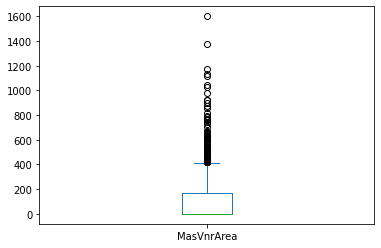

0.0      59.297521
180.0     0.550964
72.0      0.550964
108.0     0.550964
120.0     0.482094
           ...    
562.0     0.068871
89.0      0.068871
921.0     0.068871
762.0     0.068871
119.0     0.068871
Name: MasVnrArea, Length: 327, dtype: float64



0.0      58.972603
None      0.547945
72.0      0.547945
108.0     0.547945
180.0     0.547945
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 328, dtype: float64

In [70]:
# Variable = MasVnrArea
# Numerical variable
# The box of this variables indicates the presence of outliers
# Hence, its missing values are imputed with the median

column='MasVnrArea'

df[column].plot(kind='box')
plt.show()
print(df[column].value_counts(normalize=True)*100)
print()
median=df[column].median()
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

In [71]:
# Variable = BsmtQual
# Categorical variable
# "TA" is the most frequent value (frequency = 45.6%) but its frequency is not high enough (>50%).
# Only 2.5% rows are missing this variable.
# Hence, its best to drop rows with missing values.

column='BsmtQual'
print(df[column].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df[column].notna()]
df.shape

TA    45.607871
Gd    43.429375
Ex     8.503162
Fa     2.459592
Name: BsmtQual, dtype: float64

(1460, 75)


(1423, 75)

In [72]:
# Variable = BsmtCond
# Categorical variable
# Null rows of this variable have already been removed in the earlier steps

column='BsmtCond'
print(df[column].isnull().sum())

0


In [73]:
# Variable = BsmtFinType1
# Categorical variable
# Null rows of this variable have already been removed in the earlier steps

column='BsmtFinType1'
print(df[column].isnull().sum())

0


In [74]:
# Variable = BsmtExposure
# Categorical variable
# "None" is the most frequent value (frequency = 67%) and its frequency is  high enough (>50%).
# Hence, its missing values are imputed with the mode

column='BsmtExposure'
print(df[column].value_counts(normalize=True)*100)
print()
mode=df[column].mode()[0]
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

No    67.018284
Av    15.541491
Gd     9.423347
Mn     8.016878
Name: BsmtExposure, dtype: float64



No    67.041462
Av    15.530569
Gd     9.416725
Mn     8.011244
Name: BsmtExposure, dtype: float64

In [75]:
# Variable = BsmtFinType2
# Categorical variable
# "None" is the most frequent value (frequency = 67%) and its frequency is  high enough (>50%).
# Hence, its missing values are imputed with the mode

column='BsmtFinType2'
print(df[column].value_counts(normalize=True)*100)
print()
mode=df[column].mode()[0]
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

Unf    88.326301
Rec     3.797468
LwQ     3.234880
BLQ     2.320675
ALQ     1.336146
GLQ     0.984529
Name: BsmtFinType2, dtype: float64



Unf    88.334505
Rec     3.794800
LwQ     3.232607
BLQ     2.319044
ALQ     1.335207
GLQ     0.983837
Name: BsmtFinType2, dtype: float64

In [76]:
# Variable = GarageType
# Categorical variable
# "None" is the most frequent value (frequency = 63.8%) and its frequency is  high enough (>50%).
# Hence, its missing values are imputed with the mode

column='GarageType'
print(df[column].value_counts(normalize=True)*100)
print()
mode=df[column].mode()[0]
df[column]=df[column].fillna(mode)
df[column].value_counts(normalize=True)*100

Attchd     63.825056
Detchd     27.353595
BuiltIn     6.449222
Basment     1.408451
CarPort     0.518903
2Types      0.444774
Name: GarageType, dtype: float64



Attchd     65.706254
Detchd     25.931131
BuiltIn     6.113844
Basment     1.335207
CarPort     0.491918
2Types      0.421644
Name: GarageType, dtype: float64

In [77]:
# Variable = GarageYrBlt
# Categorical variable
# "2005" is the most frequent value (frequency = 4.8%) but its frequency is not high enough (>50%).
# Only 5.5% rows are missing this variable.
# Hence, its best to drop rows with missing values.

column='GarageYrBlt'
print(df[column].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df[column].notna()]
df.shape

2005.0    4.818384
2006.0    4.373610
2004.0    3.928836
2003.0    3.632320
2007.0    3.632320
            ...   
1900.0    0.074129
1906.0    0.074129
1908.0    0.074129
1927.0    0.074129
1933.0    0.074129
Name: GarageYrBlt, Length: 97, dtype: float64

(1423, 75)


(1349, 75)

In [78]:
# Variable = GarageFinish
# Categorical variable
# "Unf" is the most frequent value (frequency = 43%) but its frequency is not high enough (>50%).
# Only 5.5% rows are missing this variable.
# Hence, its best to drop rows with missing values.

column='GarageFinish'
print(df[column].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[df[column].notna()]
df.shape

Unf    42.994811
RFn    31.060044
Fin    25.945145
Name: GarageFinish, dtype: float64

(1349, 75)


(1349, 75)

In [79]:
# Variable = GarageQual
# Categorical variable
# Null rows of this variable have already been removed in the earlier steps

column='BsmtFinType1'
print(df[column].isnull().sum())

0


In [80]:
# Variable = GarageCond
# Categorical variable
# Null rows of this variable have already been removed in the earlier steps

column='BsmtFinType1'
print(df[column].isnull().sum())

0


In [81]:
# Checking for null values and data types.
# There are no null values in the dataset.

pd.set_option('display.max_rows', 1000)
null_cols=df.isnull().mean()*100
print(f'Number of columns with null values = {(null_cols>0).sum()}')
print(f'Number of columns with >10% null values = {(null_cols>10).sum()}')
print()
print(f'Shape = {df.shape}')
pd.set_option('display.max_rows', 20)

Number of columns with null values = 0
Number of columns with >10% null values = 0

Shape = (1349, 75)


In [82]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

## Fix Invalid Valus

In [83]:
# Variable = MasVnrArea
# Numerical variable
# 0.6% rows has invalid value 'None'
# Because 0.6% (8 rows) is a small number, we can drop these rows

column='MasVnrArea'
print(df[column].value_counts(normalize=True)*100)
print()
print(df.shape)
df = df[~(df[column]=='None')]
df.shape

0.0      56.412157
72.0      0.593032
108.0     0.593032
None      0.593032
180.0     0.593032
           ...    
562.0     0.074129
89.0      0.074129
921.0     0.074129
762.0     0.074129
119.0     0.074129
Name: MasVnrArea, Length: 327, dtype: float64

(1349, 75)


(1341, 75)

## Drop Unnecessary Variables


In [84]:
# Variable 'Id' does not contain useful information
# Values of variables - 'MoSold','YrSold','SaleType','SaleCondition' cannot be deteremined apriori for new data
# Hence, we drop these variable

print(df.shape)
df=df.drop(columns=['Id','MoSold','YrSold','SaleType','SaleCondition'])
df.shape

(1341, 75)


(1341, 70)

## Fix Incorrect Data Types


In [85]:
# Check datatypes

pd.set_option('display.max_rows', 100)
print(df.dtypes)
pd.set_option('display.max_rows', 10)

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [86]:
# # convert categorical variables to object datatype

# convert_to_cat=['MSSubClass','OverallQual','OverallCond']

# for column in convert_to_cat:
#   df[column]=df[column].astype('object')

# df[convert_to_cat].dtypes

In [87]:
# convert numerical variables to float datatype

df['MasVnrArea']=df['MasVnrArea'].astype('float')

df['MasVnrArea'].dtype

dtype('float64')

## Find categorical and numerical variables

In [88]:
# Find categorical and numerical variables

cat_var=df.select_dtypes(include=['object']).columns

num_var=df.drop('SalePrice',axis=1).select_dtypes(include=['int','float']).columns

print(f'Number of categorical variables = {len(cat_var)}')
print(f'Number of numerical variables = {len(num_var)}')

Number of categorical variables = 36
Number of numerical variables = 33


# EDA

## Summary Statistics

In [89]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,...,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,56.129754,10707.992543,6.220731,5.595078,1973.097688,1985.710664,110.441462,464.034303,49.465324,583.371365,...,1.872483,501.636092,99.344519,47.747204,21.216257,3.577927,16.397465,3.003729,42.836689,186824.209545
std,41.223485,10325.471320,1.324472,1.077285,29.566018,20.293145,185.493039,458.983337,166.435770,440.479524,...,0.634337,186.861051,127.428970,65.328717,60.784126,30.191245,57.991772,41.914581,507.491273,78872.093585
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000
25%,20.000000,7750.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,1.000000,379.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,412.000000,0.000000,490.000000,...,2.000000,484.000000,12.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168500.000000
75%,70.000000,11764.000000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,816.000000,...,2.000000,583.000000,173.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


## Bivariate Analysis
I performed bivariate analysis between variables and target variables. I did not perform univariate analysis on 69 variable because-- (i) large number of variables (ii) the goal of the project is to find variables having highest impact on the target variable

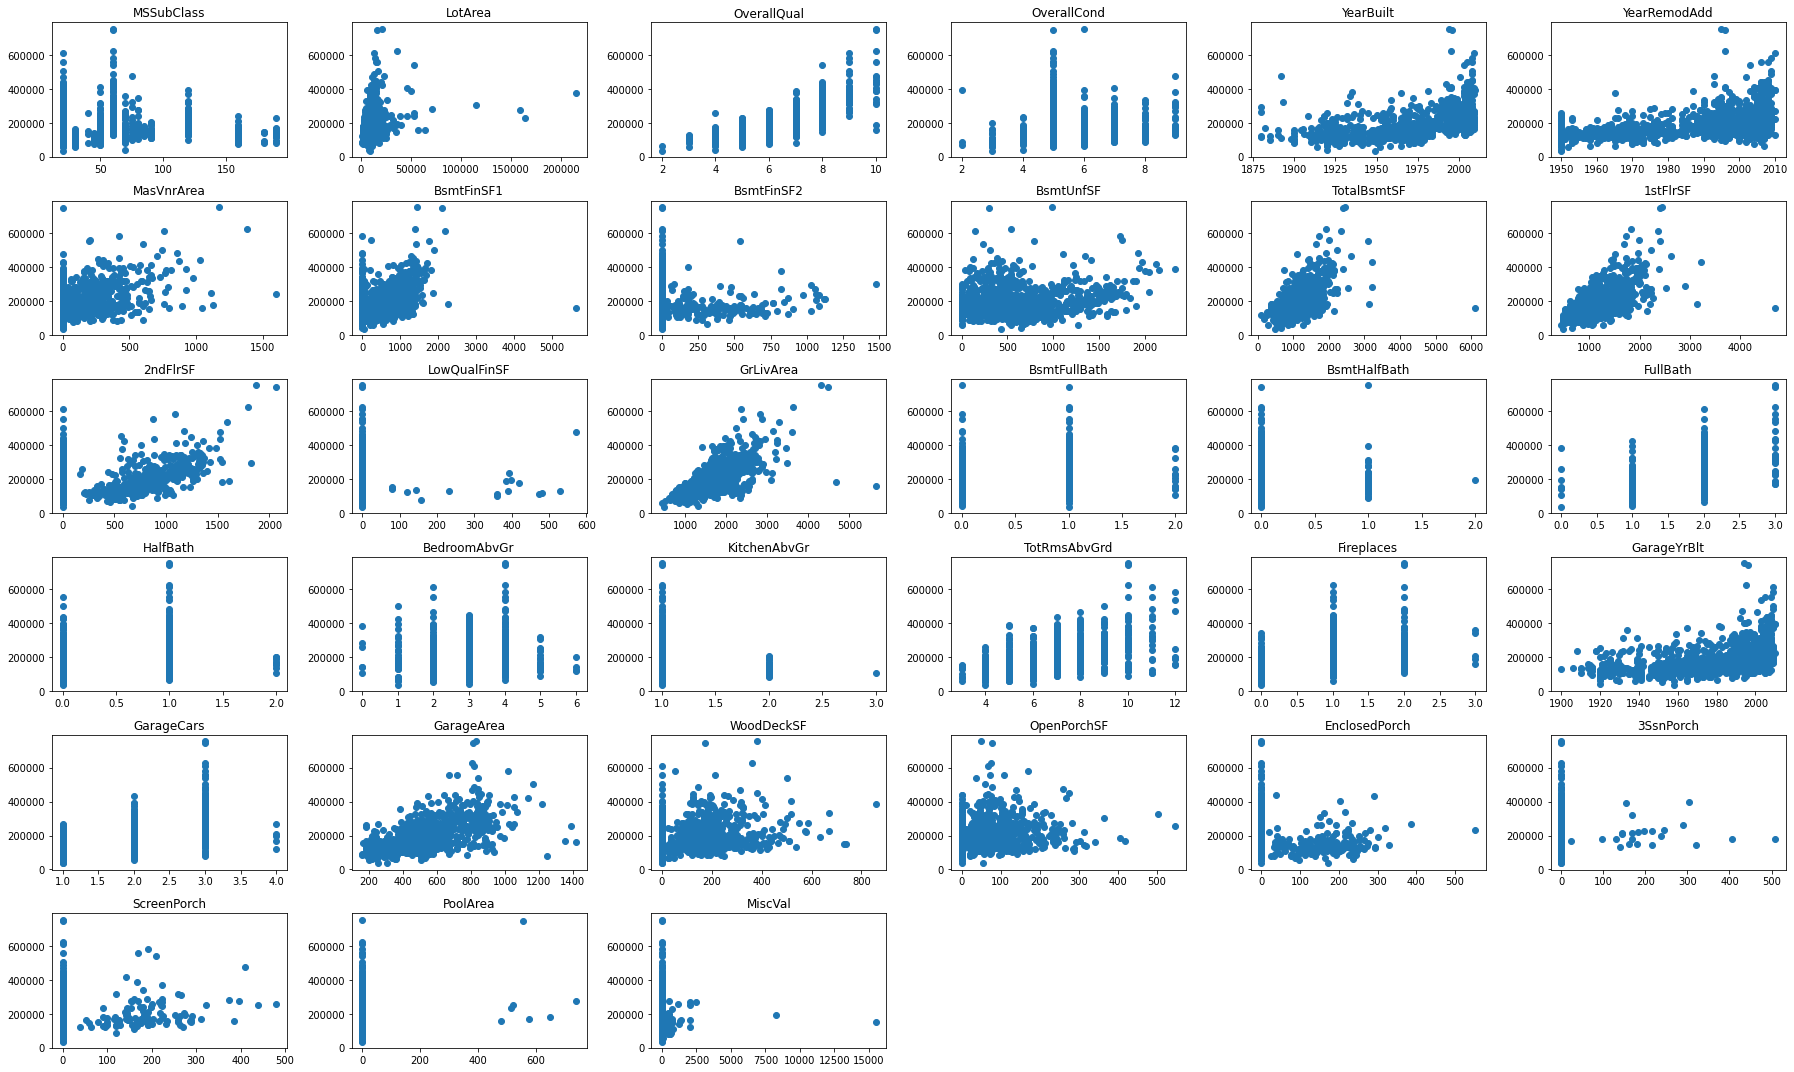

In [90]:
# Found linear and non linear relationship between variables and target variable

plt.figure(figsize=(25,15))
for idx,column in enumerate(num_var):
  ax=plt.subplot(6, 6, idx+1)
  ax.scatter(df[column],df['SalePrice'])
  ax.set_title(column)
plt.tight_layout()

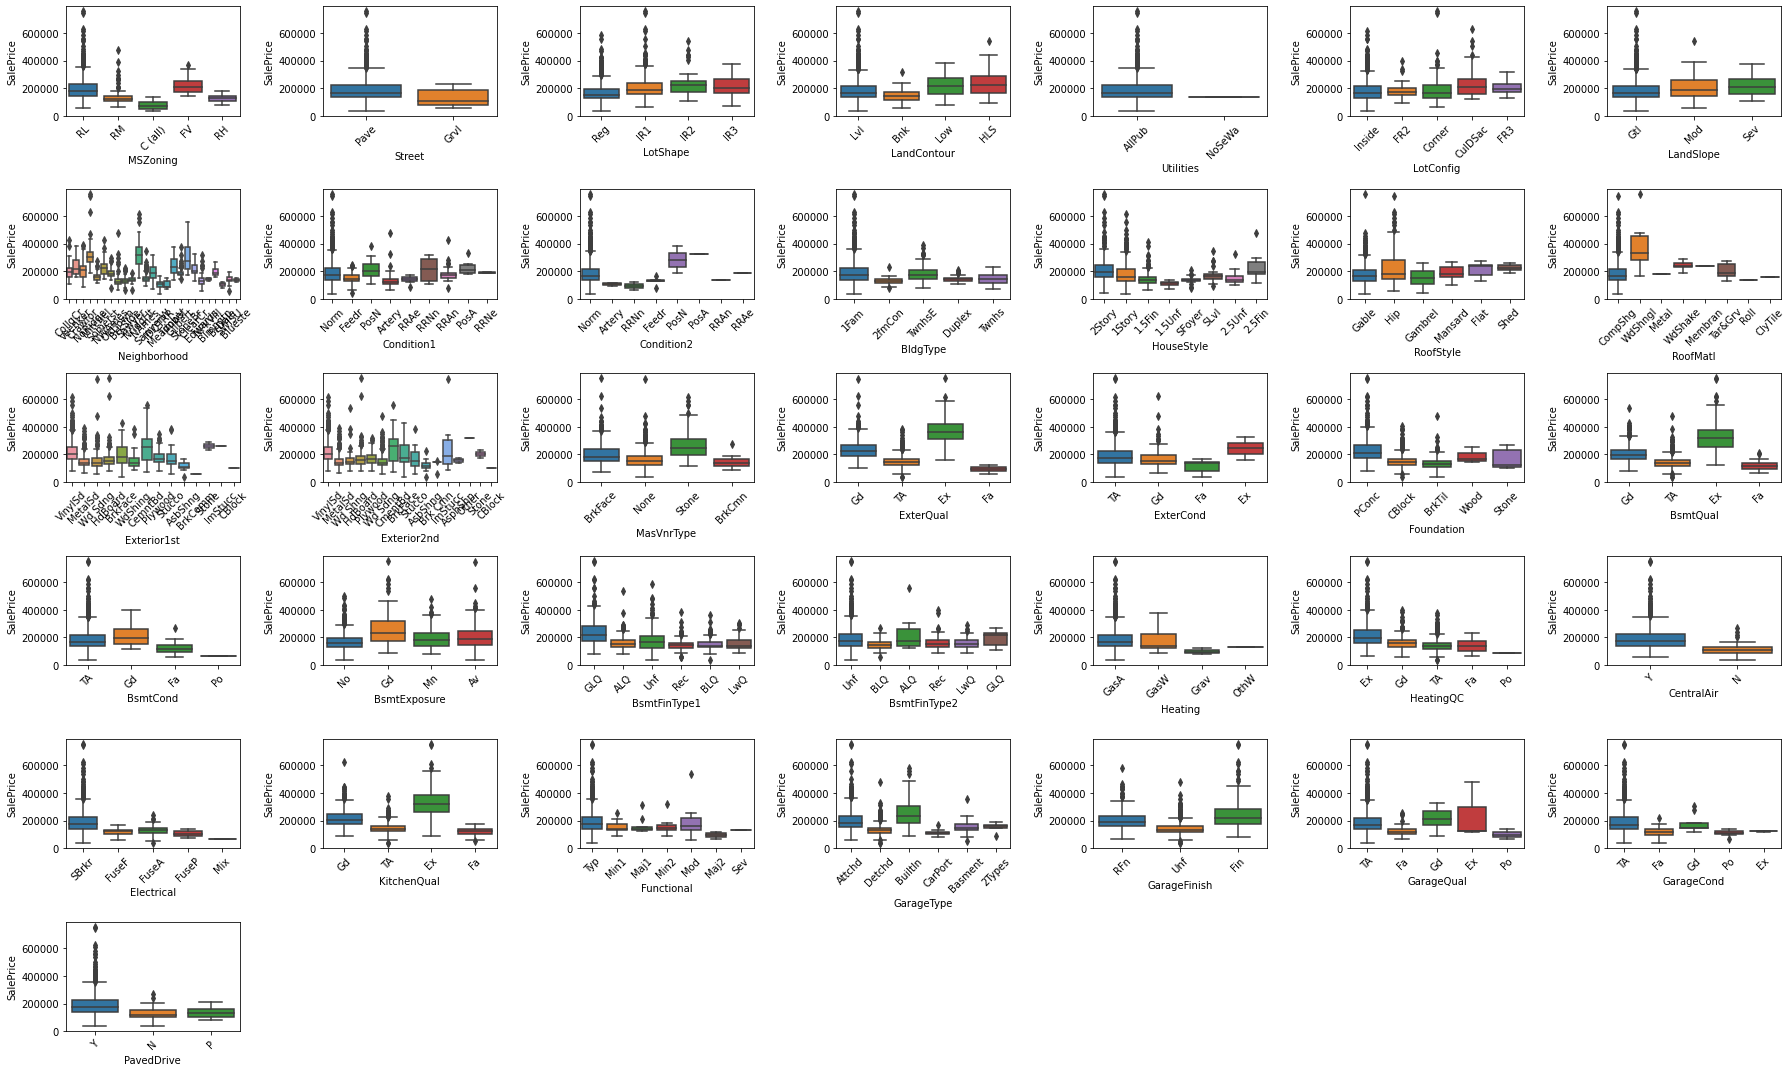

In [91]:
# Found linear and non linear relationship between variables and target variable

plt.figure(figsize=(25,15))
for idx,column in enumerate(cat_var):
  plt.subplot(6, 7, idx+1)
  sns.boxplot(x = column, y = 'SalePrice', data = df)
  plt.xticks(rotation=45)
plt.tight_layout()

# Create Derived Metrics

Because of non linear relationship I created polynomial variables

In [92]:
for column in num_var:
  df[f'{column}_square']=df[column]**2
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt_square,GarageCars_square,GarageArea_square,WoodDeckSF_square,OpenPorchSF_square,EnclosedPorch_square,3SsnPorch_square,ScreenPorch_square,PoolArea_square,MiscVal_square
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,4012009.0,4,300304,0,3721,0,0,0,0,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,3904576.0,4,211600,88804,0,0,0,0,0,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,4004001.0,4,369664,0,1764,0,0,0,0,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3992004.0,9,412164,0,1225,73984,0,0,0,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,4000000.0,9,698896,36864,7056,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,3996001.0,4,211600,0,1600,0,0,0,0,0
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,3912484.0,4,250000,121801,0,0,0,0,0,0
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,3767481.0,1,63504,0,3600,0,0,0,0,6250000
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,3802500.0,1,57600,133956,0,12544,0,0,0,0


## Find categorical and numerical variables again

In [93]:
# Find categorical and numerical variables

cat_var=df.select_dtypes(include=['object']).columns

num_var=df.drop('SalePrice',axis=1).select_dtypes(include=['int','float']).columns

print(f'Number of categorical variables = {len(cat_var)}')
print(f'Number of numerical variables = {len(num_var)}')

Number of categorical variables = 36
Number of numerical variables = 66


# Data Preparation Before Training

## Create Dummy Variables

In [94]:
# In this cell, I have defined a function to create dummy variables for categorical variables.

def create_dummy_var(df,col_name):
  dummy_var_df=pd.get_dummies(df[col_name], drop_first = True, prefix=col_name)
  df=df.drop(col_name,axis=1)
  df=pd.concat([df, dummy_var_df], axis = 1)
  return df

In [95]:
# Create dummy variables from all categorical values

for var_name in cat_var:
  df=create_dummy_var(df,var_name)

print(f'Shape = {df.shape}')
df.head()

Shape = (1341, 245)


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,1,0,1
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,1,0,1
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,1,0,1
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,0,0,0,1,0,1
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,1,0,1


## Splitting the Data into Training and Testing Sets

In [96]:
from sklearn.model_selection import train_test_split

# setting random seed for consistant results
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

# Checking shape the of training set

print(f'df_train shape = {df_train.shape}')
print(f'df_test shape = {df_test.shape}')

df_train shape = (1072, 245)
df_test shape = (269, 245)


## Dividing Training set into X and Y sets for the model building

In [97]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

# Checking shapes again

print(f'X_train shape = {X_train.shape}')
print(f'Y train shape = {y_train.shape}')
print()
print(f'X_test shape = {X_test.shape}')
print(f'Y test shape = {y_test.shape}')

X_train shape = (1072, 244)
Y train shape = (1072,)

X_test shape = (269, 244)
Y test shape = (269,)


## Rescaling the Numerical Variables


In [98]:
# I used MinMax scaling on numerical columns.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

print(f'X_train shape = {X_train.shape}')
print(f'X_test shape = {X_test.shape}')

X_train shape = (1072, 244)
X_test shape = (269, 244)


In [99]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.00000,1072.000000
mean,0.210245,0.057188,0.523204,0.510928,0.712651,0.592335,0.069227,0.081887,0.031932,0.249663,...,0.041045,0.008396,0.001866,0.945896,0.027985,0.006530,0.005597,0.958022,0.01959,0.937500
std,0.243289,0.057643,0.166669,0.152953,0.228216,0.342078,0.117626,0.081477,0.109536,0.184155,...,0.198486,0.091284,0.043173,0.226329,0.165007,0.080581,0.074638,0.200632,0.13865,0.242174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.038983,0.375000,0.428571,0.576923,0.300000,0.000000,0.000000,0.000000,0.113014,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
50%,0.176471,0.050780,0.500000,0.428571,0.734615,0.733333,0.000000,0.073618,0.000000,0.214041,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
75%,0.294118,0.063103,0.625000,0.571429,0.930769,0.900000,0.107500,0.128455,0.000000,0.347175,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [100]:
X_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.221627,0.059194,0.545074,0.524164,0.730026,0.606506,0.068225,0.083534,0.040042,0.250000,...,0.014870,0.018587,0.003717,0.962825,0.011152,0.007435,0.003717,0.977695,0.022305,0.947955
std,0.239515,0.081817,0.160170,0.157451,0.224158,0.322749,0.109133,0.080842,0.125491,0.205550,...,0.121258,0.135314,0.060971,0.189542,0.105210,0.086065,0.060971,0.147948,0.147948,0.222531
min,0.000000,0.001383,0.250000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.040591,0.375000,0.428571,0.607692,0.316667,0.000000,0.000000,0.000000,0.078767,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.235294,0.050808,0.500000,0.428571,0.738462,0.750000,0.000000,0.070872,0.000000,0.196918,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.323529,0.067067,0.625000,0.571429,0.938462,0.883333,0.112500,0.137137,0.000000,0.362586,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.309654,1.000000,1.000000,0.992308,0.983333,0.696875,0.371368,0.759837,0.921661,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model building 

## 1. Multiple Linear Regression (No Regularization)


In [101]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Add a constant
X_train_1 = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_1).fit()

y_train_pred = lr.predict(X_train_1)

print(f'\n\nR2 train set = {r2_score(y_train,y_train_pred)}')

X_test_1 = sm.add_constant(X_test,has_constant='add')

y_test_pred = lr.predict(X_test_1)

print(f'\n\nR2 on test set = {r2_score(y_test, y_test_pred)}\n\n')



R2 train set = 0.9441286486282798


R2 on test set = 0.3647746572646676




## 2. Ridge Regression (Default Alpha)


In [102]:
from sklearn.linear_model import Ridge

# Create a first fitted model
ridge = Ridge().fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = ridge.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9217


R2 on test set = 0.8175




### 10 Most Important Variables

In [103]:
list(sorted((zip(X_train.columns,np.abs(ridge.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('RoofMatl_WdShngl', 103439.36484825288),
 ('BsmtFinSF1_square', 86446.5288367691),
 ('Condition2_PosN', 85751.89074907792),
 ('1stFlrSF', 73868.17883583717),
 ('GrLivArea', 64952.29257014772),
 ('TotalBsmtSF_square', 59755.28930681827),
 ('BsmtFinSF1', 52759.64336387655),
 ('2ndFlrSF_square', 52447.475676302194),
 ('OverallQual_square', 51639.48621244105),
 ('PoolArea', 44334.887332390346)]

## 3. Lasso Regression (Default Alpha)

In [104]:
from sklearn.linear_model import Lasso

# Create a first fitted model
lasso= Lasso().fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = lasso.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9425


R2 on test set = 0.7016




### 10 Most Important Variables

In [105]:
list(sorted((zip(X_train.columns,np.abs(lasso.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('RoofMatl_WdShngl', 552501.5142878944),
 ('PoolArea_square', 531530.1468294626),
 ('PoolArea', 529750.1229482231),
 ('RoofMatl_Membran', 525726.8294786131),
 ('RoofMatl_Roll', 474487.38338608097),
 ('RoofMatl_CompShg', 464177.8151078169),
 ('RoofMatl_Tar&Grv', 458996.99946475384),
 ('RoofMatl_WdShake', 458061.22748274024),
 ('1stFlrSF', 257555.80181150293),
 ('GrLivArea_square', 245237.25296883582)]

## 4. Ridge Hyperparamter Tuning

In [106]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [108]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised

# Compared to default alpha, R2 on train set has reduced quite a lot and R2 on test set has reduced slightly 
# However, the difference between train and test set R2 is reduced that means "overfitting has reduced"

alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = ridge.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9345


R2 on test set = 0.822




### 10 Most Important Variables

In [109]:
list(sorted((zip(X_train.columns,np.abs(ridge.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('BsmtFinSF1_square', 196153.47801182044),
 ('RoofMatl_WdShngl', 150698.7148112706),
 ('Condition2_PosN', 138505.2647357074),
 ('1stFlrSF', 132805.9513772182),
 ('TotalBsmtSF_square', 119656.0951908411),
 ('BsmtFinSF1', 118537.16073657098),
 ('GrLivArea', 108037.86194991844),
 ('TotalBsmtSF', 101871.44061705336),
 ('GrLivArea_square', 95115.14508204088),
 ('OverallQual_square', 87431.61135830368)]

## 4. Lasso Hyperparamter Tuning

In [110]:
lasso = Lasso()

# cross validation
import warnings
warnings.filterwarnings("ignore")

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [112]:
# Compared to defalt alpha, R2 on train set has reduced slightly and R2 on test set has increased 
# The difference between train and test set R2 is reduced that means "overfitting has reduced"

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = lasso.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9209


R2 on test set = 0.8479




### 10 Most Important Variables

In [113]:
list(sorted((zip(X_train.columns,np.abs(lasso.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('BsmtFinSF1_square', 395355.3600119325),
 ('BsmtFinSF1', 146047.8079511702),
 ('Condition2_PosN', 137167.96763957737),
 ('GrLivArea', 107951.28006828824),
 ('RoofMatl_WdShngl', 101384.15766038772),
 ('OverallQual_square', 73502.9230811677),
 ('1stFlrSF', 69605.4038824905),
 ('MasVnrArea_square', 50892.656465517146),
 ('2ndFlrSF_square', 44521.95141275388),
 ('Neighborhood_StoneBr', 43615.87771639074)]

# Subjective Questions

## Q1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [117]:
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = ridge.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9301


R2 on test set = 0.8187




In [118]:
list(sorted((zip(X_train.columns,np.abs(ridge.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('BsmtFinSF1_square', 145745.8273556113),
 ('RoofMatl_WdShngl', 130860.48659983839),
 ('Condition2_PosN', 118030.36878193982),
 ('1stFlrSF', 108662.21462522174),
 ('TotalBsmtSF_square', 95670.12507611055),
 ('GrLivArea', 90113.74134763346),
 ('BsmtFinSF1', 88729.425629373),
 ('TotalBsmtSF', 74827.36058682499),
 ('OverallQual_square', 67781.99132416988),
 ('OpenPorchSF_square', 64774.25001527412)]

In [120]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)

print(f'\n\nR2 train set = {round(r2_score(y_train,y_train_pred),4)}')

y_test_pred = lasso.predict(X_test)

print(f'\n\nR2 on test set = {round(r2_score(y_test, y_test_pred),4)}\n\n')



R2 train set = 0.9046


R2 on test set = 0.8434




In [121]:
list(sorted((zip(X_train.columns,np.abs(lasso.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('BsmtFinSF1_square', 141315.36722018704),
 ('RoofMatl_WdShngl', 98473.51532481202),
 ('Condition2_PosN', 85599.61901477624),
 ('OverallQual_square', 83014.9679204572),
 ('GrLivArea', 81240.04162256488),
 ('1stFlrSF', 56709.20985792774),
 ('GarageCars_square', 46476.23411115641),
 ('2ndFlrSF_square', 45167.681856635),
 ('BsmtFinSF1', 44592.32117881542),
 ('Neighborhood_StoneBr', 44429.18873905697)]

## Q3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [125]:
alpha = 50

drop_cols=['BsmtFinSF1_square', 'BsmtFinSF1','Condition2_PosN',\
           'GrLivArea','RoofMatl_WdShngl']

X_train_1 = X_train.drop(columns=drop_cols)

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

list(sorted((zip(X_train.columns,np.abs(lasso.coef_))),key=lambda x:x[1],reverse=True))[:10]

[('BsmtFinSF1_square', 307523.27344479255),
 ('BsmtUnfSF', 164440.86068673796),
 ('TotalBsmtSF', 131687.2549127829),
 ('BsmtUnfSF_square', 93191.29349475296),
 ('MSSubClass_square', 77703.16151354027),
 ('LotArea', 49056.13948379399),
 ('3SsnPorch', 46463.45683191016),
 ('TotRmsAbvGrd_square', 44705.396959453195),
 ('Neighborhood_Sawyer', 43963.197763530596),
 ('YearBuilt_square', 43180.79070521534)]